<a href="https://colab.research.google.com/github/PythonAICoder/MachLearning/blob/master/LinearRegressionwTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Tensorflow2.0


In [2]:
#Importing nessesscary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import datetime
import time
import random

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
plt.style.use("fivethirtyeight")
tf.compat.v1.disable_eager_execution()

###EQUATION: ############### y=-7.018333333333211e-06x+10254.897027666497 #############
##############################OR y=4.120264489871436e-06x + -5250.689416195902#########
# n_samples = 30
epochs = 200
training_rate = 0.01
n_samples = 1570

###I scale my data between 0 and 1 to make it easier for the optimizer to give an accurate result



> I can do this by adding a new column("Scale CLose"). I divide each y value by the largest y value in the set to make the Close a decimal between 0 and 1

```
data['<Column>'] = data['<y_values>'].apply(lambda close: close/<y_set>.max() or max(<y_set>))
```







(1571, 7)


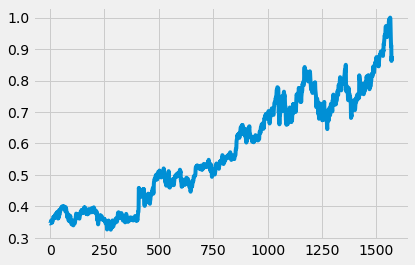

In [4]:
start_date = '2013-12-01'
end_date = '2020-03-01'
# Set the ticker
ticker = 'GOOGL'
# Get the data
data = data.get_data_yahoo(ticker, start_date, end_date)

data.reset_index(level=0, inplace=True)
#data.to_csv("stocks.csv")
data = data.iloc[::-1]


# x= np.linspace(0,1570,100)
# y = 4.120264489871436e-06*x + -5250.689416195902
# plt.plot(x,y)

#plt.show()

print(data.shape)
# test_x = np.linspace(0,35, n_samples)
# test_y = 5* test_x + 5 * np.random.randn(n_samples)

# plt.plot(test_x, test_y, 'o')
data['Timestamp'] = data['Date'].apply(lambda date: time.mktime(datetime.datetime.strptime(str(date),"%Y-%m-%d %H:%M:%S").timetuple()))
data['Scale Close'] = data['Close'].apply(lambda close: close/data["Close"].max())
data['Scale Close'].plot()
test_x = data['Timestamp']
test_y = data["Scale Close"]

In [5]:
X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

W = tf.Variable(1, name = "weights", dtype=tf.float32)
B = tf.Variable(0, name = "bias", dtype=tf.float32)

# x = np.linspace(0,1570,100)
# plt.plot(x, W*x + B)
# plt.show()

pred = tf.math.add( tf.math.multiply(X,W), B)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


># $(∞∑(n=0)) * 2^n = -1$


### **This is the cost function used for measuring the preformance of our model for Linear Regression. This is used below:**

In [0]:
cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

### Using Adam Optimizer

In [0]:

print('Weight',W, 'bias', B,'Prediction',pred,'Cost Function',cost)

optimizer = tf.compat.v1.train.AdamOptimizer(training_rate).minimize(cost)

init = tf.compat.v1.global_variables_initializer()

try:
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        start = time.time()

        for epoch in range(epochs):
            inepoch = time.time()

            for index, row in data.iterrows():
                sess.run(optimizer, feed_dict={X:test_x[index],Y:test_y[index]})
                afopt = time.time()
            c = sess.run(cost, feed_dict = {X:test_x[epoch], Y:test_y[epoch]})
            w = sess.run(W)
            b = sess.run(B)
            if not epoch % 20:
                print('Took',str(int(afopt-inepoch)),'seconds to run optimizer')
                if epoch > 20:
                    print('Every ten epochs, prog takes',str(evten-inepoch),'seconds')
                print('epoch:',epoch,'c=',c,'w=', w,'b=', b)
                evten = time.time()
                
        #plt.plot(test_x, test_y, 'o')
        #plt.plot(test_x, 5 * test_x + 5, label = "Answer")
        
        weight = sess.run(W)
        bias = sess.run(B)
        print('weight, bias=', weight, bias)

        # learned_answer = []
        # for items in test_x.iteritems():
        #     items = np.float32(items)
        #     learned_answer.append(items*weight + bias)
        # learn = pd.DataFrame({'Learned Answer': learned_answer})

        
        data['Learned Answer'] = test_x.apply(lambda stamp: weight * stamp + bias)

        end = time.time()
        print('Took',str(int(end-start)/60),'minutes long')

        print(data["Learned Answer"])

        data['Learned Answer'].plot()
        
        plt.legend()
        plt.show()

        test_date = '2025-01-01 00:00:00'
        timestamp = time.mktime(datetime.datetime.strptime(test_date,"%Y-%m-%d %H:%M:%S").timetuple())

        answer = timestamp * weight + bias
        print('Stock in',test_date,'will most likely be',answer*data['Close'].max())
        print(data)
except KeyboardInterrupt or Exception as e:
    if Exception:
        print(e)
    if KeyboardInterrupt:
        exit()

Weight <tf.Variable 'weights:0' shape=() dtype=float32> bias <tf.Variable 'bias:0' shape=() dtype=float32> Prediction Tensor("Add:0", dtype=float32) Cost Function Tensor("truediv:0", shape=(), dtype=float32)
Took 1 seconds to run optimizer
epoch: 0 c= 3.529017e-08 w= 9.809961e-10 b= -1.0029706
Took 1 seconds to run optimizer
epoch: 20 c= 2.3465672 w= 6.28104e-08 b= -1.0027915
Took 1 seconds to run optimizer
Every ten epochs, prog takes -21.374086618423462 seconds
epoch: 40 c= 0.44363883 w= 2.78189e-08 b= -1.0012766
Took 1 seconds to run optimizer
Every ten epochs, prog takes -21.306434869766235 seconds
epoch: 60 c= 0.034059327 w= -6.41484e-09 b= -1.0031052


##Testing Code on stock most likely be in January 1st 2025



```
test_date = '2025-01-01 00:00:00'
timestamp = time.mktime(datetime.datetime.strptime(test_date,"%Y-%m-%d %H:%M:%S").timetuple())

answer = timestamp * weight + bias
print('Stock in',test_date,'will most likely be',answer*data['Close'].max())
print(data)
```

